In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
columns_names = ['user_id','item_id','raiting','timestamp']

In [3]:
df = pd.read_csv('u.data',sep='\t',names = columns_names)

In [4]:
df.head()

,user_id,item_id,raiting,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movies_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
#we can see there is co relation between item id and title

In [8]:
df = pd.merge(df,movies_titles,on='item_id')

In [9]:
df.head()

,user_id,item_id,raiting,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [10]:
sns.set_style('white')

In [11]:
#now we are going to create a rating df with avg rating and number of raiting


In [12]:
df.groupby('title')['raiting'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: raiting, Length: 1664, dtype: float64

In [13]:
df.groupby('title')['raiting'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: raiting, dtype: float64

In [14]:
#we have to rember we did a groupby method it may be the case that only one or two people have rated
#the movie

In [15]:
#Now lets see the movie with the most raitings

In [16]:
df.groupby('title')['raiting'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: raiting, dtype: int64

In [17]:
raitings = pd.DataFrame(df.groupby('title')['raiting'].mean())

In [18]:
raitings.head()

,raiting
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
#now lets create a number of raiting columns 


In [20]:
raitings['num of raitings'] = pd.DataFrame(df.groupby('title')['raiting'].count())

In [21]:
raitings.head()

,raiting,num of raitings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [22]:
#now lets go ahead and explore this by making a histgram

<AxesSubplot:>

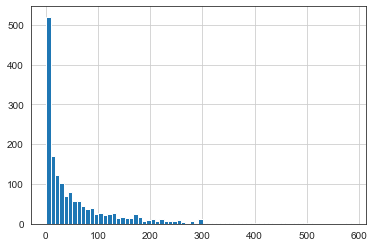

In [23]:
raitings['num of raitings'].hist(bins = 70)

In [24]:
#we can see that most the movies have 0 or 1 rating

<AxesSubplot:>

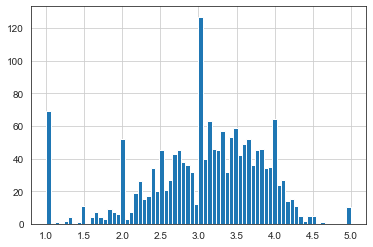

In [25]:
raitings['raiting'].hist(bins = 70)

In [26]:
#most movies are distributed in the area of 3 to 3.5 stars

In [27]:
#now lets see the relation between average rating and number of raiting

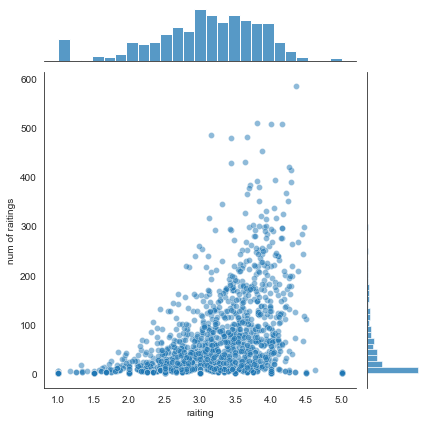

In [28]:
sns.jointplot(x='raiting',y='num of raitings',data=raitings,alpha=0.5)

# Now lets begin the process of making the Recommendation system

In [29]:
df.head()

,user_id,item_id,raiting,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [30]:
moviemat = df.pivot_table(index='user_id',columns='title',values='raiting')

In [31]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
raitings.sort_values('num of raitings',ascending = False).head(10)

,raiting,num of raitings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [33]:
#now what we are going to do is choose 2 movies lets choose StarWars and Liar Liar

In [34]:
starwars_user_raitings = moviemat['Star Wars (1977)']
liarliar_user_raitings = moviemat['Liar Liar (1997)']

In [35]:
starwars_user_raitings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [36]:
#we can use corewith to get co relation between 2 pandas series

In [37]:
similar_to_starwars = moviemat.corrwith(starwars_user_raitings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [38]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_raitings)

In [39]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace = True)

In [40]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [41]:
#now lets filter the movies with less than 100 reviews

In [42]:
corr_starwars = corr_starwars.join(raitings['num of raitings'])

In [43]:
corr_starwars.head()

,Correlation,num of raitings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [44]:
corr_starwars[corr_starwars['num of raitings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of raitings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [45]:
#now we can see this makes sense because the Empire strikes back is another star wars movies and is 
#-highly corelated to the Star wars movie
#also we can see huge drop in corelation in the Austin powers movies because the user may or maynot 
#-like this movie if he/she likes star wars because it is a comedy movie
#the reason Austion Powers is showing up is because it may also be avery popular movie like star wars
#and also raiders of the lost ark is and excellent movie there for it also has a high co relation

In [46]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace = True)
corr_liarliar = corr_liarliar.join(raitings['num of raitings'])

In [47]:
corr_liarliar[corr_liarliar['num of raitings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of raitings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [48]:
#so these are the movies suggested to us if we like liarliar